<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Author:_ Tim Book

### Learning Objectives 
- Describe modeling.
- Calculate mean squared error.
- State the assumptions of a linear regression model.
- Be able to interpret the coefficients of a linear regression model.
- Identify the difference between simple and multiple linear regression.
- Fit, generate predictions from, and evaluate a linear regression model in `sklearn`, and maybe in `statsmodels`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Data
Data source: [here](https://www.rdocumentation.org/packages/fpp2/versions/2.3/topics/elecdemand)

The data consist of electricity demand for Victoria, Australia every half-hour in 2014. We have three columns:

* Total electricity demand (in gigawatts)
* Whether or not it is a workday (0/1)
* Temperature (Celcius)

In [2]:
elec = pd.read_csv("data/elecdemand.csv")

# We'll limit our focus to only days in which it was
# at least 15 degrees Celcius (59 F)
elec = elec[elec["temp"] > 15]

print(elec.shape)
elec.head()

(9807, 3)


,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


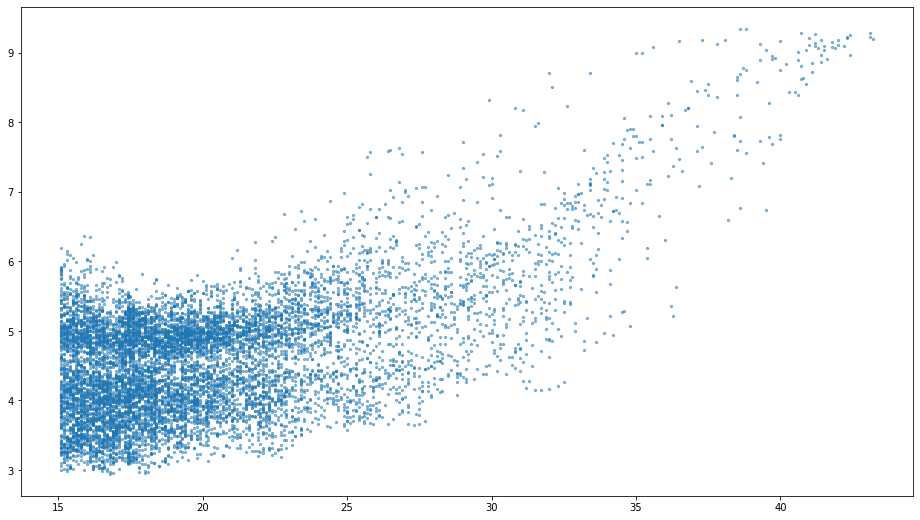

In [3]:
# Plot temperature vs. demand
plt.figure(figsize=(16, 9))
plt.scatter(elec['temp'], elec['demand'], s=5, alpha=0.5);

In [4]:
# Step 1: Assemble our X and y variables

# We need an X matrix that is n-by-p (in this case, p = 1)
X = elec[['temp']]

# We need a y vector that is length n
y = elec['demand']

In [5]:
X.shape

(9807, 1)

In [6]:
y.shape

(9807,)

In [7]:
# Step 2: Import our model class
from sklearn.linear_model import LinearRegression

In [8]:
# Step 3: Instantiate the model
lr = LinearRegression()

In [9]:
lr

LinearRegression()

In [10]:
# Step 4: Fit the model
lr.fit(X, y) # THIS IS IT --> THIS IS. MACHINE LEARNING

LinearRegression()

In [11]:
# Take a peek at the model coefficient and intercept
lr.coef_ # This is Beta_hat_1

array([0.11415682])

In [12]:
lr.intercept_ # this is Beta_hat_0

2.318762978267358

## Results
We now have the following model of reality:

$$\hat{d} = 2.32 + 0.11t$$

#### Interpretation of our slope.

This slope (beta_hat_1) is telling us how changes in temperature affect electricity demand. So for every 1 degree celsius increase in temp. we can expect the electricity demand to increase by about ~ 0.11 GW.

#### Interpretation of our y-intercept. Does it make sense?

When it's 0C outside, we expect 2.32 GW of electricity to be demanded.

**Does this make sense?**
Sure, you can have 0 degrees celsius

But! We don't have any data below 15C. We're **extrapolating**. This is the act of making predictions outside the bound of the data that you have. And, you can do this, but it can often be a bad idea. 


In [13]:
# Thread: How many GW will be used/demanded if it is 20C outside?
lr.intercept_ + lr.coef_ * 20

array([4.6018994])

In [14]:
# Make predictions
y_pred = lr.predict(X)
y_pred[:10]

array([4.39641712, 4.36217008, 4.32792303, 4.23659757, 4.17951916,
       4.21376621, 4.21376621, 4.22518189, 4.16810348, 4.21376621])

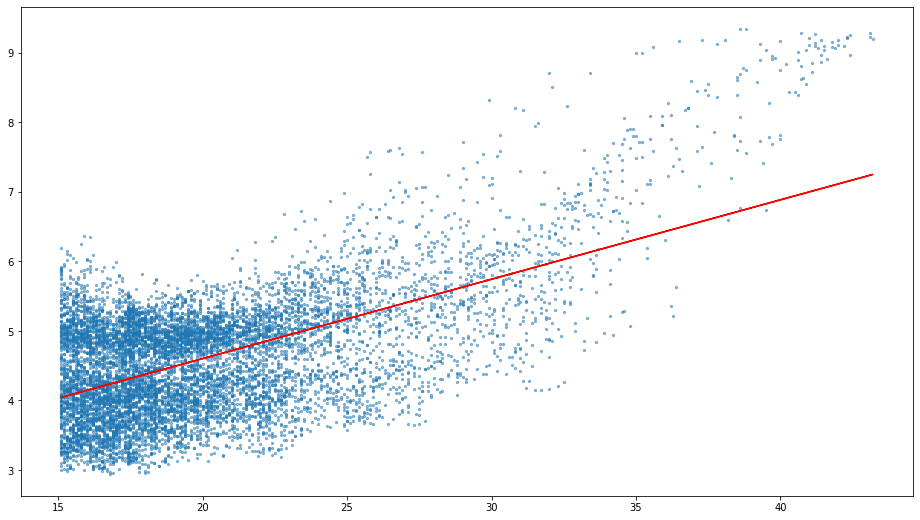

In [15]:
# We can plot them, too!
plt.figure(figsize=(16, 9))
plt.scatter(elec['temp'], elec['demand'], s=5, alpha=0.5)
plt.plot(elec['temp'], y_pred, color='red');

## Evaluation

$$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum e_i^2 $$

In [16]:
# Create residuals
resids = y - y_pred
resids[:10]

0   -0.481770
1   -0.689620
2   -0.830384
3   -0.897453
4   -0.975207
5   -1.113724
6   -1.174299
7   -1.213093
8   -1.150833
9   -1.187094
Name: demand, dtype: float64

In [17]:
# (THREAD) Compute the MSE
sum((y - y_pred)**2) / len(resids)

np.mean(resids**2)

0.5050316037069883

In [18]:
mse = np.mean(resids**2)

**(THREAD)** Suppose we had no _x_-variable at all. What would be our best guess for each $\hat{y}_i$?

In [19]:
# Create the predictions for the "null model" or "baseline model"
y_bar = np.mean(y)
y_bar

4.6245247308369555

In [20]:
# The null MSE
null_mse = np.mean((y-y_bar)**2)
null_mse

0.7796885466312025

Another popular regression metric is the $R^2$, which is defined as:

$$R^2 = 1 - \frac{\text{MSE}}{\text{Null MSE}} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

The $R^2$, or **coefficient of determination**, is the proportion of variability in $y$ we can explain with $x$.

In [21]:
# The R2
1 - mse / null_mse

0.35226494490771143

#### Interpret R2

35.2% of the variability in electricity demand can be explained by temperature.

In [22]:
from sklearn import metrics

In [23]:
print(y)
print()
print(y_pred)

0        3.914647
1        3.672550
2        3.497539
3        3.339145
4        3.204313
           ...   
17515    3.724836
17516    3.761887
17517    3.809415
17518    4.135946
17519    4.217047
Name: demand, Length: 9807, dtype: float64

[4.39641712 4.36217008 4.32792303 ... 4.27084462 4.22518189 4.21376621]


In [24]:
# Can compute it from metrics...
metrics.r2_score(y, y_pred)

0.3522649449077143

In [25]:
# We can get the MSE
metrics.mean_squared_error(y, y_pred)

0.5050316037069877

In [26]:
# ... or directly from the model...
lr.score(X, y)

0.3522649449077143

## NOW YOU

Fit the model of demand versus temperature _and_ workday, and compute the $R^2$. For an added bonus challenge, try to fit the model of demand versus temperature, temperature **squared**, and workday, and again compute the $R^2$.

In [27]:
elec['temp2'] = elec['temp']**2
xvars = ['temp', 'workday']


X = elec[xvars]
y = elec['demand']

In [28]:
X.shape

(9807, 2)

In [29]:
y.shape

(9807,)

In [30]:
model = LinearRegression()

model.fit(X, y)
print(model.score(X, y))

y_pred = model.predict(X)
metrics.mean_squared_error(y, y_pred)

0.5200405227104942


0.3742189072897277

## LINE Assumptions
Let's check em!

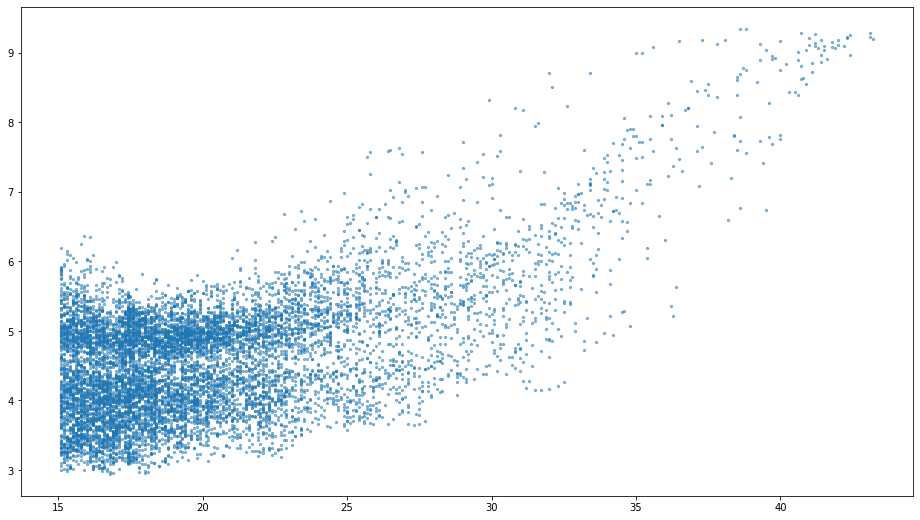

In [31]:
# L - see above plot(s)
plt.figure(figsize=(16, 9))
plt.scatter(elec['temp'], elec['demand'], s=5, alpha=0.5);

In [32]:
# I - Yes, by assumption?
# Probably not :shrug:

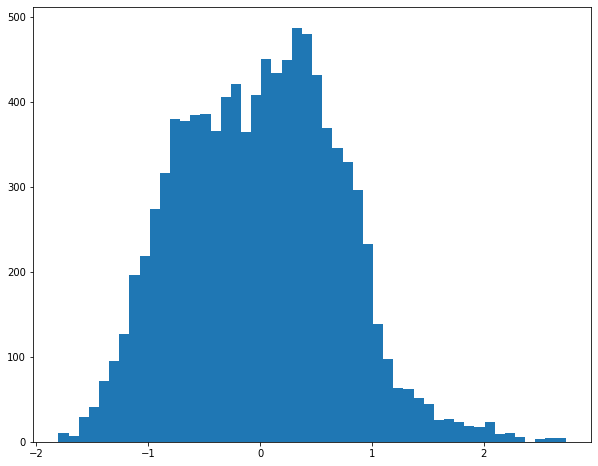

In [33]:
# N - Normality of errors
plt.figure(figsize=(10,8))
plt.hist(resids, bins=50);

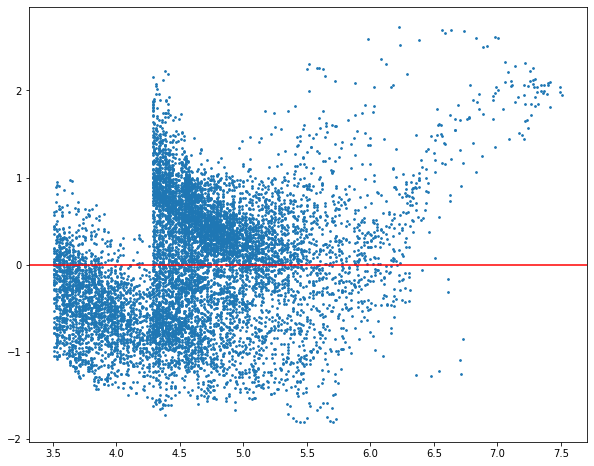

In [34]:
# E - Equal variance of errors
plt.figure(figsize=(10,8))
plt.scatter(y_pred, resids, s=3)
plt.axhline(0, color='red');

# Part II: Multiple Linear Regression (MLR) and Categorical Features

## Bikeshare Data
Data adapted from source: [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [35]:
bike = pd.read_csv("data/bikeshare.csv")
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
bike.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [37]:
# Some preprocessing:
# 1 - Rename "count" to "riders"
bike.rename(columns={'count': 'riders'}, inplace=True)
# 2 - Drop "casual" and "registered"
bike.drop(columns=['casual', 'registered'], inplace=True)
# 3 - Cast "datetime" to actually be a datetime
bike['datetime'] = pd.to_datetime(bike['datetime'])
# 4 - Drop only row where weather == 4
bike = bike[bike['weather'] != 4]

In [39]:
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
riders                 int64
dtype: object

In [42]:
# bike["datetime"].dt.month

In [40]:
# Season vs Month
pd.crosstab(bike["season"], bike["datetime"].dt.month)

datetime,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,883,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


### Ridership model
Let's try to predict the number of riders based on temperature and what season it is. We'll have to **dummify** the season column!

In [43]:
X = bike[['season', 'temp']]
X.head()

,season,temp
0,1,9.84
1,1,9.02
2,1,9.02
3,1,9.84
4,1,9.84


In [46]:
# Dummify "season"
X = pd.get_dummies(columns=['season'], data=X, drop_first=True)

In [47]:
y = bike['riders']

In [48]:
# Fit model
rider_model = LinearRegression()
rider_model.fit(X, y)


array([  13.74269709,  -42.50544518, -105.32350516,   26.08224525])

In [63]:
X.head(10)

,temp,season_2,season_3,season_4
0,9.84,0,0,0
1,9.02,0,0,0
2,9.02,0,0,0
3,9.84,0,0,0
4,9.84,0,0,0
5,9.84,0,0,0
6,9.02,0,0,0
7,8.20,0,0,0
8,9.84,0,0,0
9,13.12,0,0,0


In [52]:
rider_model.intercept_

-55.899400974462964

In [49]:
# Coefficients
rider_model.coef_

array([  13.74269709,  -42.50544518, -105.32350516,   26.08224525])

### Interpretation of coefficients
Now that we have multiple variables, our interpretation are **holding all other variables constant**. Furthermore, each interpretation of a dummy variable is **in relation to the baseline** (in this case, Winter).

**Interpretation of $\hat{\beta}_3$:**

The effect of being in July, Aug, Sept, on ridership is what we expect 105 fewer people to check out bikes per hour, relative to it being winter, holding temp constant

## NOW YOU
Now your turn: Fit a model that uses _all_ x-variables (excluding `atemp`) as well as the **the hour of day**. Dummify columns accordingly.

In [53]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [54]:
xvars = [
    "season", "holiday", "workingday",
    "weather", "temp", "humidity",
    "windspeed", "hour"
]

# Additional, not-really-BONUS topics

## ANRBT #1: Multicollinearity
Multicollinearity occurs when you have two or more $x$-variables that are correlated with eachother. This phenomenon doesn't affect the quality of the model fit, but it completely destroys model inference (ie, confidence intervals and hypothesis tests, more on this next week). In addition, it can also contribution to a **rank-deficient matrix**, meaning the model can't be fit at all!

In [ ]:
np.corrcoef(bike.temp, bike.atemp)

## ANRBT #2: The Curse of Dimensionality
It turns out that the more variables we add to our model, the better it is. Actually, it doesn't even matter what this variable was, that will always be true. Even if it's completely irrelevant. That is, if we added the following variables to our model:

* Is there a sunspot on this day?
* The closing stock price of Apple that day.
* Whether or not Guy Fieri had pancakes for breakfast that day.
* A column of completely random standard normal variables

Our model is **guaranteed** to get better. But it isn't _really_ a better model, right? It turns out, we're modeling **noise**, not **signal**. We'll talk more about this phenomenon later.

## ANRBT #3: Matrix Notation and Solution
Recall our matrix notations:

$$
\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}^T
$$

$$
\beta = \begin{bmatrix} \beta_0 & \beta_1 & \cdots & \beta_p \end{bmatrix}^T
$$

$$
\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np} \\ 
\end{bmatrix}
$$

It then works out we can write our model as:

$$\mathbf{y} = \mathbf{X}\beta + \varepsilon$$

Which makes our solution:

$$\mathbf{\hat{y}} = \mathbf{X}\hat{\beta}$$

where

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Look confusing? It is! It haunts the dreams of second-year grad students. But it's not _too_ mysterious. If you'd like to understand it better, check out the **numpy ladder challenge**. Really, the take away here is singular:

### **The solution to our problem exists in closed form and can be computed by simple matrix multiplication.**

## ANRBT #4: The `statsmodels` Library
Scikit-Learn does not hold the monopoly in doing linear regression in Python. In fact, you may even like this better!

In [1]:
import statsmodels.api as sm

X = elec[["temp", "workday"]]
X = sm.add_constant(X)
y = elec["demand"]
ols = sm.OLS(y, X).fit()

NameError: name 'elec' is not defined

In [ ]:
ols.summary()

# Conclusions and Takeaways:
* Machine learning, aka statistical modeling, is an important and vast topic we'll spend much of our course exploring. It comes in many varieties for different situations.
* Linear regression is a **supervised "white-box" regression model**.
* As far as machine learning goes, OLS is very simple, yet still powerful.
* One of its more enticing feature is that its **coefficients are interpretable!**
* In the midst of all this, we learned how to handle dummy variables, something important for all of the models we'll learn about.

In [64]:
sample = [
    {"cik_str":1750,"ticker":"AIR","title":"AAR CORP"},
    {"cik_str":1800,"ticker":"ABT","title":"ABBOTT LABORATORIES"},
    {"cik_str":1961,"ticker":"WDDD","title":"WORLDS INC"},
    {"cik_str":2034,"ticker":"ACET","title":"ACETO CORP"},
    {"cik_str":2098,"ticker":"ACU","title":"ACME UNITED CORP"},
    {"cik_str":2178,"ticker":"AE","title":"ADAMS RESOURCES & ENERGY, INC."},
    {"cik_str":2186,"ticker":"BKTI","title":"BK Technologies Corp"},
    {"cik_str":2488,"ticker":"AMD","title":"ADVANCED MICRO DEVICES INC"},
    {"cik_str":2809,"ticker":"AEM","title":"AGNICO EAGLE MINES LTD"},
    {"cik_str":2969,"ticker":"APD","title":"AIR PRODUCTS & CHEMICALS INC /DE/"},
    {"cik_str":3116,"ticker":"AKRX","title":"AKORN INC"},
    {"cik_str":3116,"ticker":"AKRXQ","title":"AKORN INC"},
    {"cik_str":3153,"ticker":"ALP-PQ","title":"ALABAMA POWER CO"},
    {"cik_str":3153,"ticker":"ALPVN","title":"ALABAMA POWER CO"},
    {"cik_str":3153,"ticker":"APRCP","title":"ALABAMA POWER CO"},
    {"cik_str":3153,"ticker":"APRDM","title":"ALABAMA POWER CO"}
]

In [67]:
new_list = []
[new_list.append(n['ticker']) for n in sample]
new_list


['AIR',
 'ABT',
 'WDDD',
 'ACET',
 'ACU',
 'AE',
 'BKTI',
 'AMD',
 'AEM',
 'APD',
 'AKRX',
 'AKRXQ',
 'ALP-PQ',
 'ALPVN',
 'APRCP',
 'APRDM']

In [70]:
sample[0]['ticker']

'AIR'